# Computer Vision Assignment #1 2016-16466 윤웅상

본 과제에서는 이미지의 2dfft를 통해 phase와 magnitude의 의미를 알아보고, perspective change, camera calibration을 실습해본다

# 1번 문제

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 1500
img1=Image.open('img1.jpg')
img2=Image.open('img2.jpg')
print(img1.width, img1.height)
print(img2.width, img2.height)
img1.show()
img2.show()


500 375
720 465


In [2]:
print(img2)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=720x465 at 0x202BC16BC08>


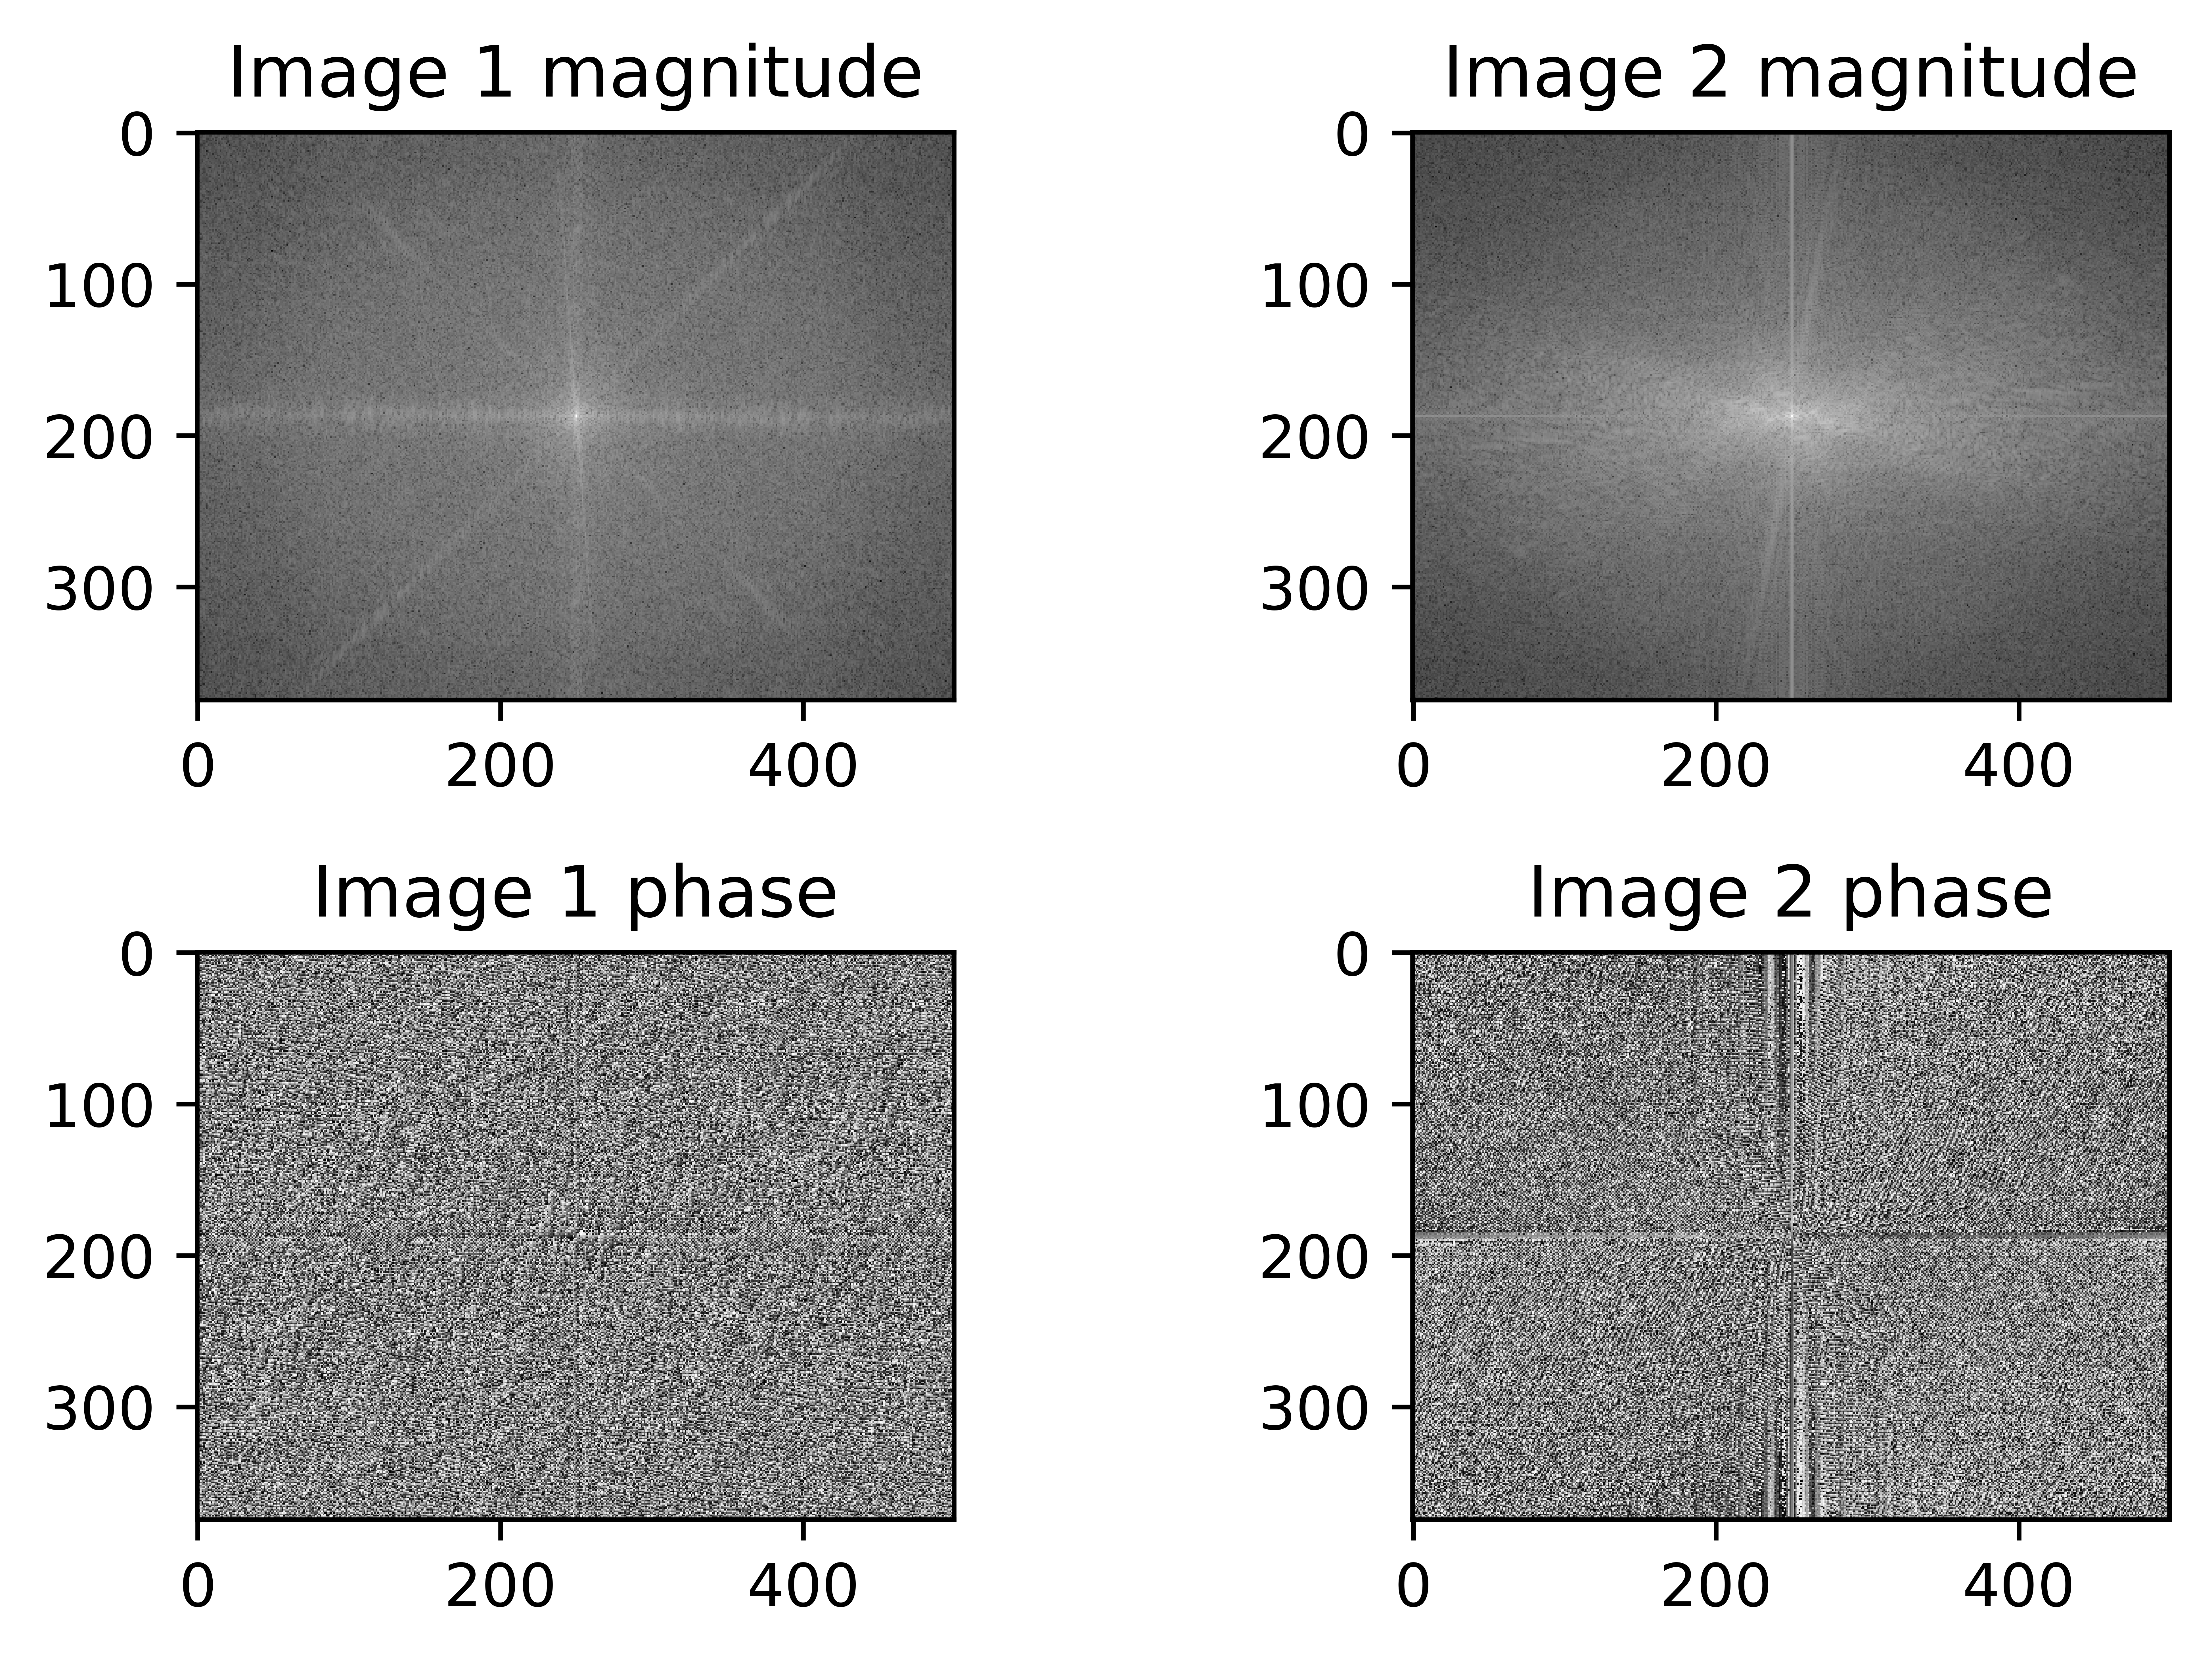

In [2]:
img2=img2.resize((500,375))
img1_f=np.fft.fft2(img1)
img2_f=np.fft.fft2(img2)
img1_fs=np.fft.fftshift(img1_f)
img2_fs=np.fft.fftshift(img2_f)
img1_mag=20*np.log(np.abs(img1_fs))
img2_mag=20*np.log(np.abs(img2_fs))
img1_phase=np.angle(img1_fs)
img2_phase=np.angle(img2_fs)
plt.subplot(221)
plt.title('Image 1 magnitude')
plt.imshow(img1_mag, cmap='gray')
plt.subplot(222)
plt.title('Image 2 magnitude')
plt.imshow(img2_mag, cmap='gray')
plt.subplot(223)
plt.title('Image 1 phase')
plt.imshow(img1_phase, cmap='gray')
plt.subplot(224)
plt.title('Image 2 phase')
plt.imshow(img2_phase, cmap='gray')
plt.tight_layout()

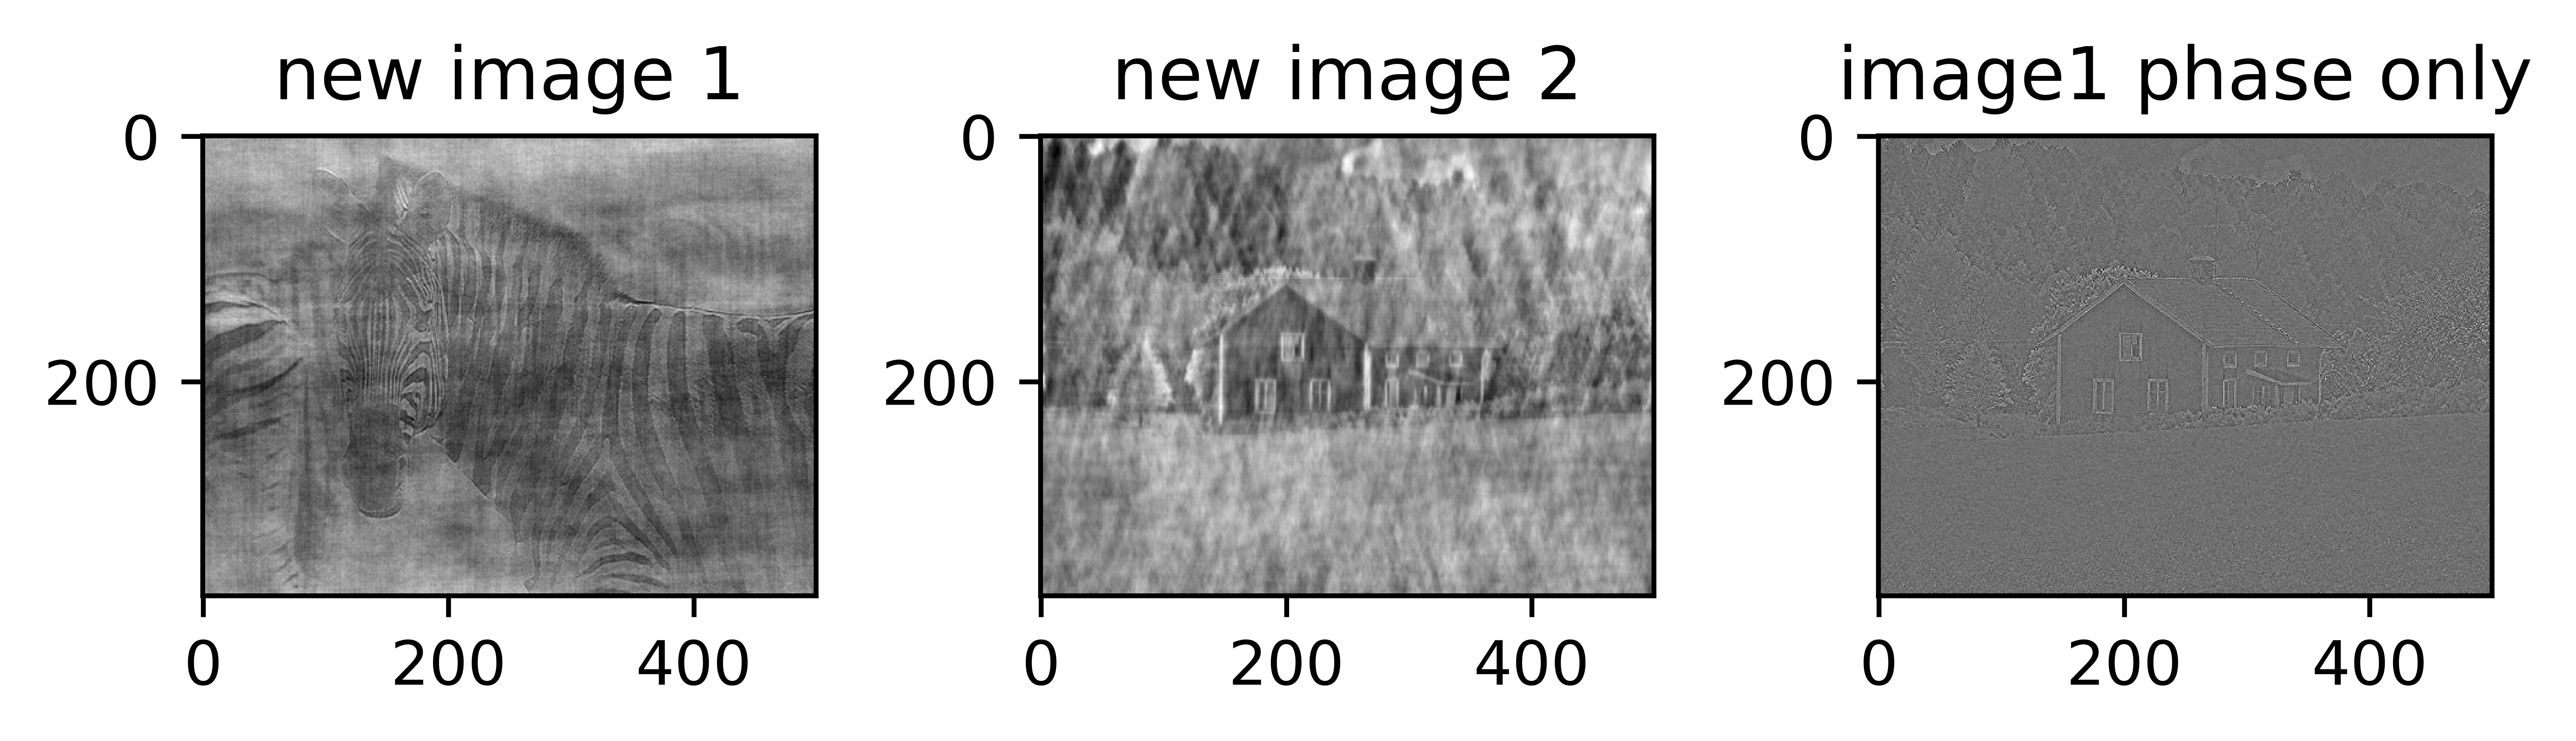

In [6]:
new_img1_f= np.multiply(np.abs(img1_f), np.exp(1j*np.angle(img2_f)))
new_img1=np.real(np.fft.ifft2(new_img1_f))
new_img2_f= np.multiply(np.abs(img2_f), np.exp(1j*np.angle(img1_f)))
new_img2=np.real(np.fft.ifft2(new_img2_f))
new_img3=np.real(np.fft.ifft2(np.exp(1j*np.angle(img1_f))))
plt.subplot(131)
plt.title('new image 1')
plt.imshow(new_img1, cmap='gray')
plt.subplot(132)
plt.title('new image 2')
plt.imshow(new_img2, cmap='gray')
plt.subplot(133)
plt.title('image1 phase only')
plt.imshow(new_img3, cmap='gray')
plt.tight_layout()

Discussion: 
우선 이미지의 2dfft는 magnitude 부분과 phase 부분으로 나눌 수 있다. 이는 이미지를 phase shift가 있는 sinusoid component 들로 나눈것이다. 이때 phase는 이 component들의 phase shift에 해당하고, magnitude는 크기에 해당한다. 앞의 결과에서 봤듯이 magnitude를 plot하면 가운데 하얀색 점이 있는 대칭적인 형태를 띄는데 이 이유는, 각 compnent들간의 위상이 0이기 때문이다. 따라서 가운데에서 maximum value를 갖게 되어 하얀색 점이 나타나는것이다. 그림에서 "image1 phase only"는 이미지1의 phase만을 가지고 image reconstruction을 한것이다. 그림에서 볼 수 있듯이, phase정보만으로도 feature extraction에 성공했는데 이는 원래 그림에서 line과 edge들에서의 sinusoid component들의 phase가 대부분 같기 때문이다(principle of phase congruency). new image 1은 image 1의 magnitude와 image 2의 phase를 합쳐서 만든 새로운 이미지인데 여기에서도 알 수 있듯이, image1보다는 image2에 가깝다. 따라서 image에서 magnitude보다 phase 정보가 feature extraction을 담당하므로 훨씬 중요하다는것을 알 수 있다.

# 2번 문제

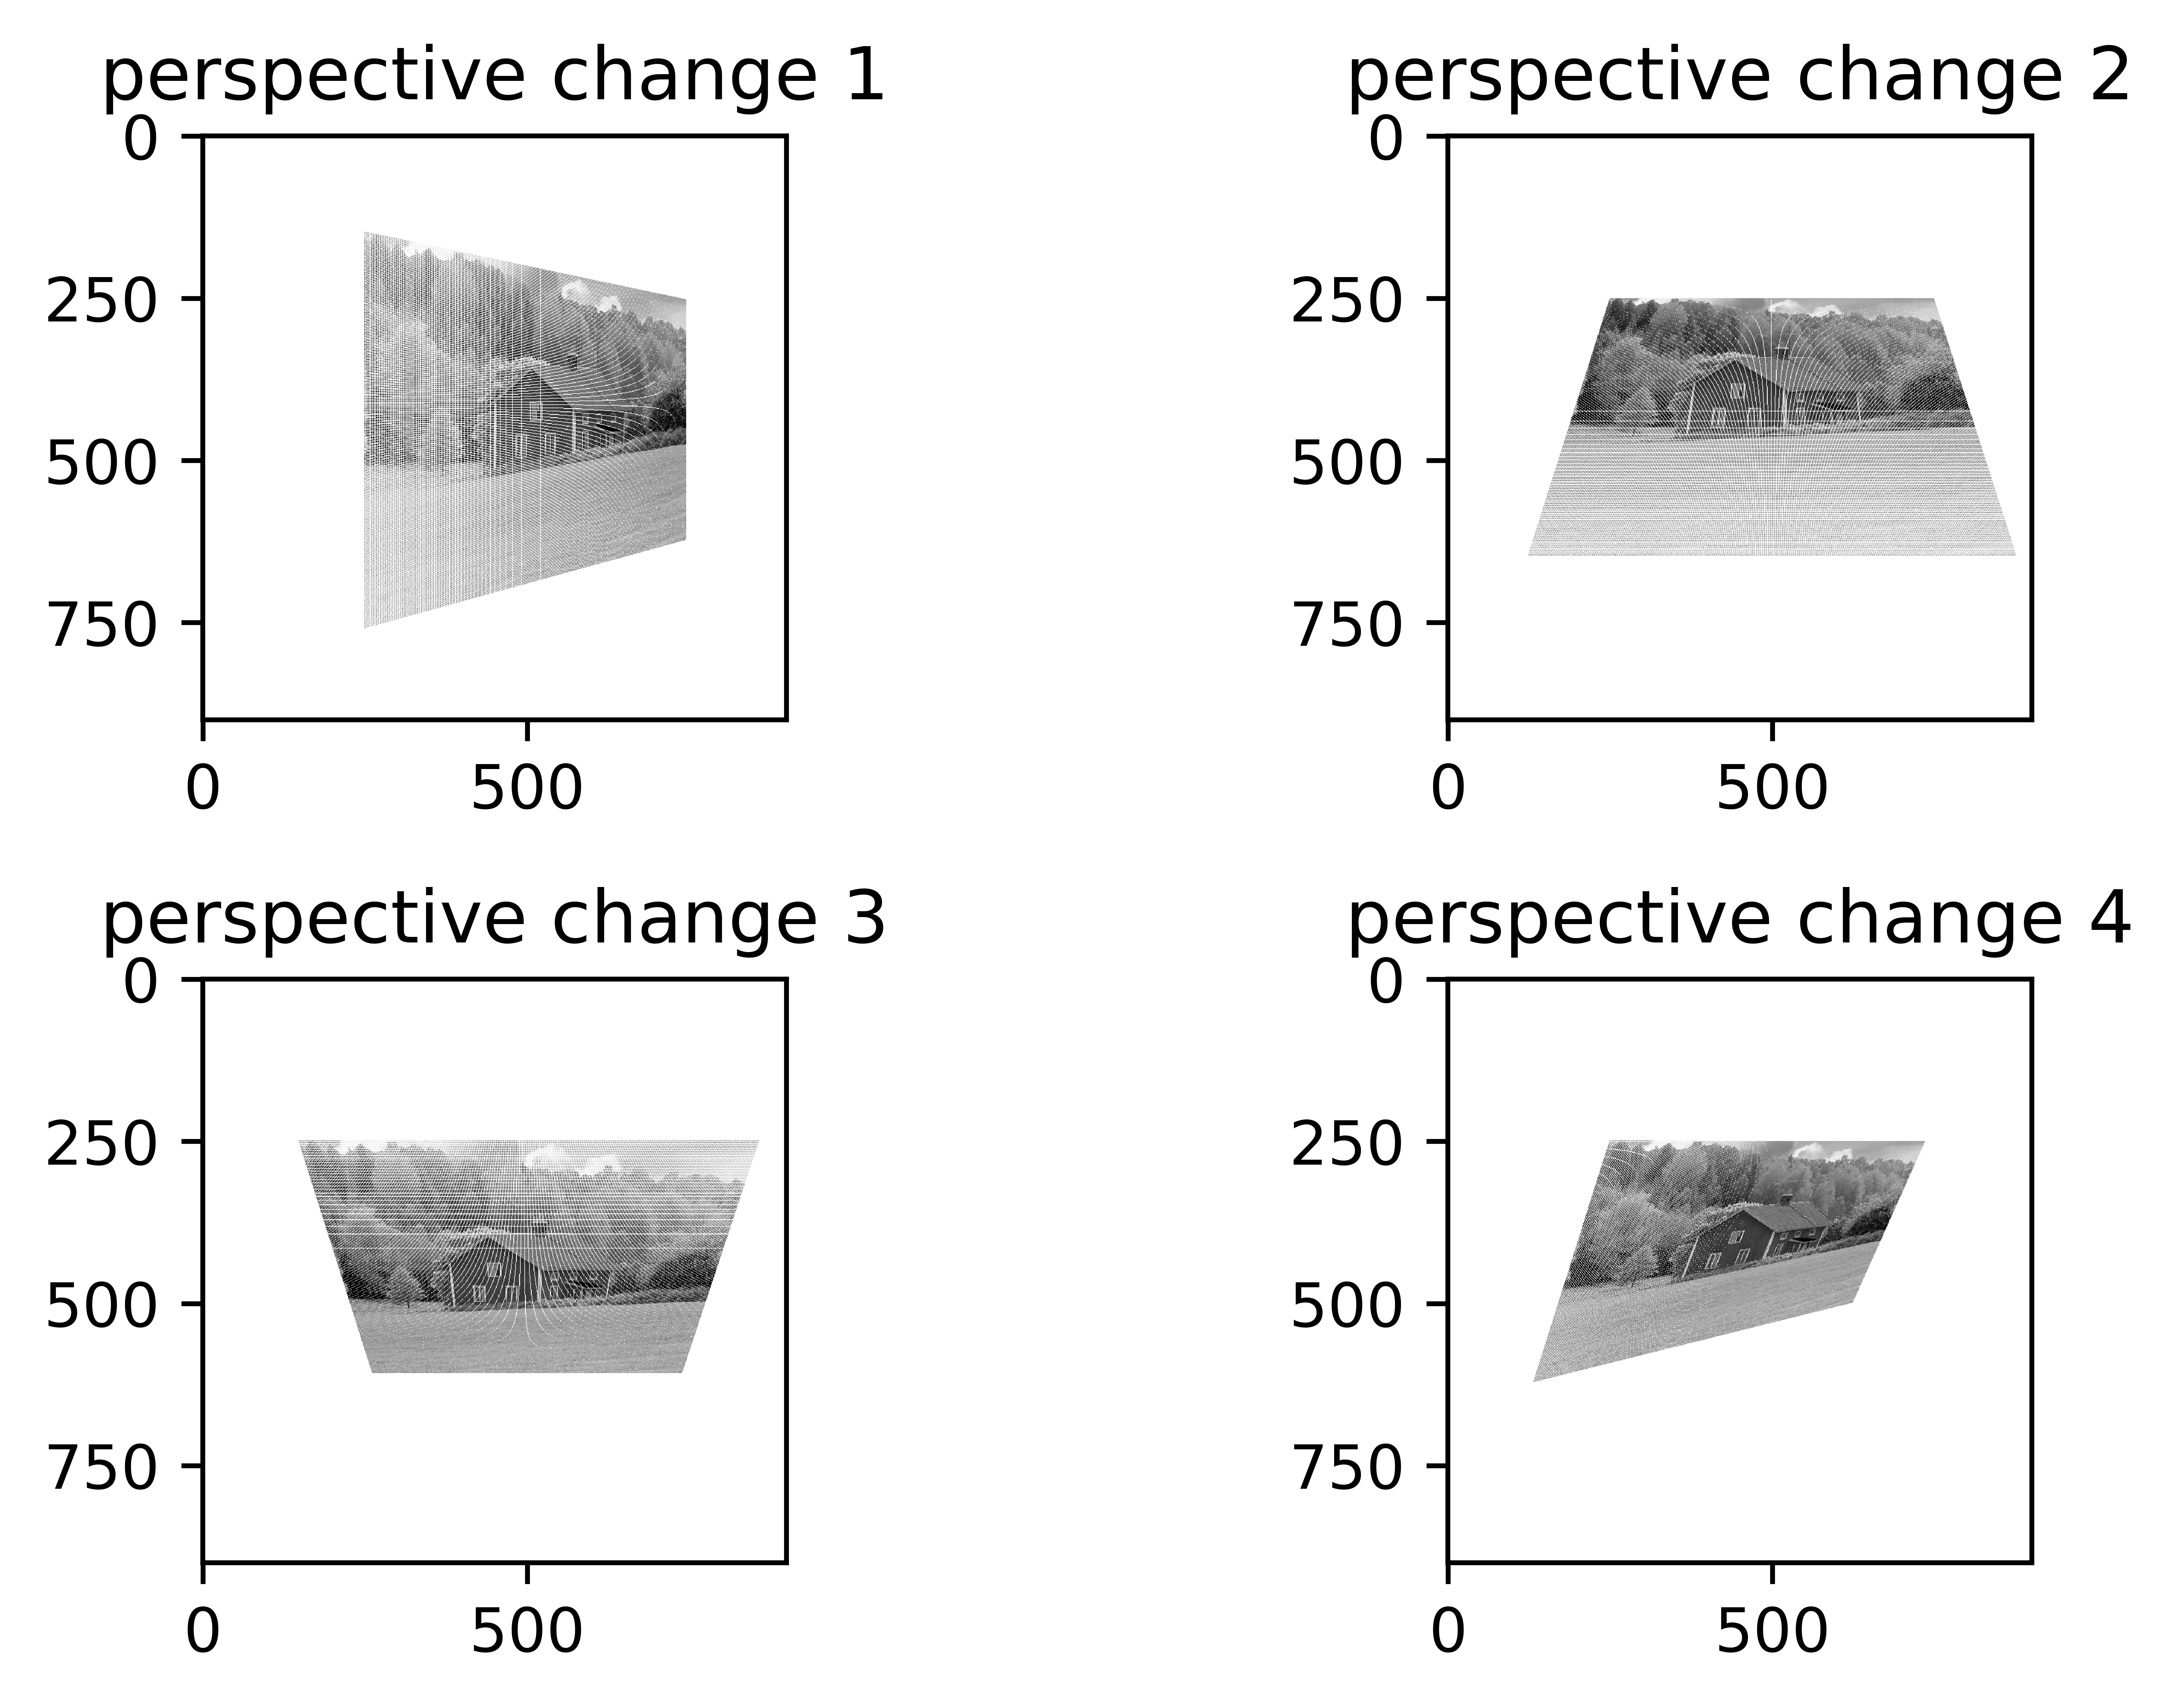

In [36]:
M1=np.array([[1.6322, 0, 0],[0.2120, 1.6336, 0.0013],[-101.9757, -0.6322, 1.0000]]).transpose()
M2=np.array([[0.7033, -0.2239, -0.0009], [0, 0.9991, 0], [0.2958, 0.2239, 1.0000]]).transpose()
M3=np.array([[1.4219, 0.3183, 0.0013], [0, 1.4206, 0], [-0.4206, -101.8704, 1.000]]).transpose()
M4=np.array([[1.1044, -0.3493, 0.0003], [0.0011, 1.5066, 0.0011], [-0.1041, -0.1560, 1.0000]]).transpose()
data=np.asarray(img1)

def p_trans(M,x,y):
    arr=[x,y,1]
    result=np.dot(M,arr)
    result=np.floor_divide(result,result[2])
    return result
#변환된 이미지의 좌표가 음수를 갖을수도 있으며, 크기를 예측할 수 없기때문에 넉넉한 크기의 행렬을 선언하고 변환된 좌표를 평행이동해준다
arr1=np.zeros((900,900))
arr1.fill(255)
arr2=np.zeros((900,900))
arr2.fill(255)
arr3=np.zeros((900,900))
arr3.fill(255)
arr4=np.zeros((900,900))
arr4.fill(255)

for i in range(0,375):
    for j in range(0, 500):
        result=p_trans(M1,i,j)
        u=int(result[0])+250 #평행이동해주는 부분
        v=int(result[1])+250
        arr1[u][v]=data[i][j]

for i in range(0,375):
    for j in range(0, 500):
        result=p_trans(M2,i,j)
        u=int(result[0])+250
        v=int(result[1])+250
        arr2[u][v]=data[i][j]

for i in range(0,375):
    for j in range(0, 500):
        result=p_trans(M3,i,j)
        u=int(result[0])+250
        v=int(result[1])+250
        arr3[u][v]=data[i][j]    

for i in range(0,375):
    for j in range(0, 500):
        result=p_trans(M4,i,j)
        u=int(result[0])+250
        v=int(result[1])+250
        arr4[u][v]=data[i][j]

pimg1_1=Image.fromarray(arr1)
pimg1_2=Image.fromarray(arr2)
pimg1_3=Image.fromarray(arr3)
pimg1_4=Image.fromarray(arr4)

plt.subplot(221)
plt.title('perspective change 1')
plt.imshow(pimg1_1, cmap='gray')
plt.subplot(222)
plt.title('perspective change 2')
plt.imshow(pimg1_2, cmap='gray')
plt.subplot(223)
plt.title('perspective change 3')
plt.imshow(pimg1_3, cmap='gray')
plt.subplot(224)
plt.title('perspective change 4')
plt.imshow(pimg1_4, cmap='gray')
plt.tight_layout()


# 3번문제 b)번부터

In [37]:
uv = [[0 for i in range(2)] for j in range(20)]
xyz1= [[0 for i in range(4)] for j in range(20)]
uv_data=open('uv.txt','r')
xyz1_data=open('xyz.txt','r')

for i in range(20):
    line=uv_data.readline().split()
    uv[i][0]=int(line[0])
    uv[i][1]=int(line[1])
for i in range(20):
    line=xyz1_data.readline().split()
    xyz1[i][0]=float(line[0])
    xyz1[i][1]=float(line[1])
    xyz1[i][2]=float(line[2])
    xyz1[i][3]=float(1)
#A행렬의 값을 일일이 입력할 수 없으므로 텍스트 파일로 읽은 다음에 규칙에 맞게 행렬을 concatenate해서 A를 만들었다
A=[]
zero=[0,0,0,0]
for i in range(40):
    if i%2==0:
        temp=[]
        temp=np.hstack((temp,xyz1[int(i/2)]))
        temp=np.hstack((temp,zero))
        temp=np.hstack((temp,[x * -uv[int(i/2)][0] for x in xyz1[int(i/2)]]))
        if i==0:
            A=np.hstack((A,temp))
        else:
            A=np.vstack((A,temp))
    else:
        temp=[]
        temp=np.hstack((temp,zero))
        temp=np.hstack((temp,xyz1[int((i-1)/2)]))
        temp=np.hstack((temp,[x * -uv[int(i/2)][1] for x in xyz1[int((i-1)/2)]]))
        A=np.vstack((A,temp))
U,D,Vt=np.linalg.svd(A)
V=Vt.transpose()
p=V[:,11]
print('p행렬')
print(p)
p=p/p[11]
print('m34를 1로 scaling 했을때의 p 행렬')
print(p)

p행렬
[ 3.09963996e-03  1.46204548e-04 -4.48497465e-04 -9.78930678e-01
  3.07018252e-04  6.37193664e-04 -2.77356178e-03 -2.04144405e-01
  1.67933533e-06  2.74767684e-06 -6.83964827e-07 -1.32882928e-03]
m34를 1로 scaling 했을때의 p 행렬
[-2.33260962e+00 -1.10025080e-01  3.37513233e-01  7.36686567e+02
 -2.31044166e-01 -4.79515070e-01  2.08722206e+00  1.53627263e+02
 -1.26377057e-03 -2.06774255e-03  5.14712340e-04  1.00000000e+00]


# 3-C)

In [38]:
new_A=A[:,0:11]
uv=np.array(uv)
b=uv.reshape([1,40]).transpose()
A_pin=np.linalg.pinv(new_A)
x=np.matmul(A_pin,b)
print('method2를 사용했을때의 p행렬')
print(x)
print('3-b)의 결과에서 알 수 있듯이 둘은 같은 결과를 보여준다')

method2를 사용했을때의 p행렬
[[-2.33259098e+00]
 [-1.09993113e-01]
 [ 3.37413916e-01]
 [ 7.36673920e+02]
 [-2.31050254e-01]
 [-4.79506029e-01]
 [ 2.08717636e+00]
 [ 1.53627756e+02]
 [-1.26379606e-03]
 [-2.06770917e-03]
 [ 5.14635233e-04]]
3-b)의 결과에서 알 수 있듯이 둘은 같은 결과를 보여준다
